# **Time Series Regression: Trend & Seasonality Analysis**

## Objective
The objective of this project is to build regression-based time series models
to forecast sales by capturing trend and seasonality patterns.
A baseline linear regression model is compared with a polynomial regression
model to evaluate performance improvement.


In [1]:
#@title Import Required Libraries

# Core data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Visualization settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 5)

print("Libraries imported successfully")


Libraries imported successfully


In [2]:
# @title Load dataset

df = pd.read_csv("train.csv")

df.head()


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0
1,1,2013-01-01,1.0,BABY CARE,0.0,0.0
2,2,2013-01-01,1.0,BEAUTY,0.0,0.0
3,3,2013-01-01,1.0,BEVERAGES,0.0,0.0
4,4,2013-01-01,1.0,BOOKS,0.0,0.0


In [3]:
# @title Dataset OverView

print("Dataset Shape:", df.shape)
df.info()


Dataset Shape: (188350, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188350 entries, 0 to 188349
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           188350 non-null  int64  
 1   date         188350 non-null  object 
 2   store_nbr    188349 non-null  float64
 3   family       188349 non-null  object 
 4   sales        188349 non-null  float64
 5   onpromotion  188349 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 8.6+ MB


In [4]:
# @title Missing Value Handling (Business Logic)

# Fill missing promotion values with 0 (no promotion)
df['onpromotion'].fillna(0, inplace=True)

# Confirm missing values
df.isnull().sum()


/tmp/ipython-input-1287993093.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['onpromotion'].fillna(0, inplace=True)


,0
id,0
date,0
store_nbr,1
family,1
sales,1
onpromotion,0


In [5]:
# @title Date Processing

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Sort chronologically
df = df.sort_values('date')

# Set date as index
df.set_index('date', inplace=True)

df.head()


,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1.0,AUTOMOTIVE,0.0,0.0
2013-01-01,1194,42.0,CELEBRATION,0.0,0.0
2013-01-01,1193,42.0,BREAD/BAKERY,0.0,0.0
2013-01-01,1192,42.0,BOOKS,0.0,0.0
2013-01-01,1191,42.0,BEVERAGES,0.0,0.0


In [6]:
# @title Feature Engineering
# Extract time-based features
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['weekday'] = df.index.weekday  # captures weekly seasonality

df[['year', 'month', 'day', 'weekday', 'sales']].head()


,year,month,day,weekday,sales
date,,,,,
2013-01-01,2013,1,1,1,0.0
2013-01-01,2013,1,1,1,0.0
2013-01-01,2013,1,1,1,0.0
2013-01-01,2013,1,1,1,0.0
2013-01-01,2013,1,1,1,0.0


In [7]:
# @title Define Features & Target

# Feature matrix (X) and target variable (y)
X = df[['year', 'month', 'day', 'weekday', 'onpromotion']]
y = df['sales']

print("Features used:", X.columns.tolist())


Features used: ['year', 'month', 'day', 'weekday', 'onpromotion']


In [8]:
# @title Train Test Split

# Time-aware split to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)


Training size: (150680, 5)
Testing size: (37670, 5)


# **🧠 MODEL 1 — BASELINE**

Linear Regression

In [9]:
# @title Train linear regression

# Train baseline linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)


In [10]:
# @title Evaluate Linear Regression
# Evaluation metrics

# Filter out NaN values from y_test and y_pred_lr for accurate metric calculation
valid_indices = ~y_test.isna()
y_test_cleaned = y_test[valid_indices]
y_pred_lr_cleaned = y_pred_lr[valid_indices]

mae_lr = mean_absolute_error(y_test_cleaned, y_pred_lr_cleaned)
rmse_lr = np.sqrt(mean_squared_error(y_test_cleaned, y_pred_lr_cleaned))

print("Linear Regression MAE:", mae_lr)
print("Linear Regression RMSE:", rmse_lr)

Linear Regression MAE: 312.4531558715597
Linear Regression RMSE: 712.6188507526296


# MODEL 2 — ADVANCED

Polynomial Regression (Trend + Seasonality)

In [11]:
# @title Polynomial Feature Transformation

# Create polynomial features to capture non-linear trend
poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [12]:
# @title Train Polynomial Regression
# Train regression model on polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predictions
y_pred_poly = poly_model.predict(X_test_poly)


In [13]:
# @title Evaluate Polynomial Regression

# Evaluation metrics
# Filter out NaN values from y_test and y_pred_poly for accurate metric calculation
valid_indices_poly = ~y_test.isna()
y_test_cleaned_poly = y_test[valid_indices_poly]
y_pred_poly_cleaned = y_pred_poly[valid_indices_poly]

mae_poly = mean_absolute_error(y_test_cleaned_poly, y_pred_poly_cleaned)
rmse_poly = np.sqrt(mean_squared_error(y_test_cleaned_poly, y_pred_poly_cleaned))

print("Polynomial Regression MAE:", mae_poly)
print("Polynomial Regression RMSE:", rmse_poly)

Polynomial Regression MAE: 316.87794879434733
Polynomial Regression RMSE: 712.3901858208408


In [14]:
# @title Model Performance Comparison

results = pd.DataFrame({
    "Model": ["Linear Regression", "Polynomial Regression"],
    "MAE": [mae_lr, mae_poly],
    "RMSE": [rmse_lr, rmse_poly]
})

results

,Model,MAE,RMSE
0,Linear Regression,312.453156,712.618851
1,Polynomial Regression,316.877949,712.390186


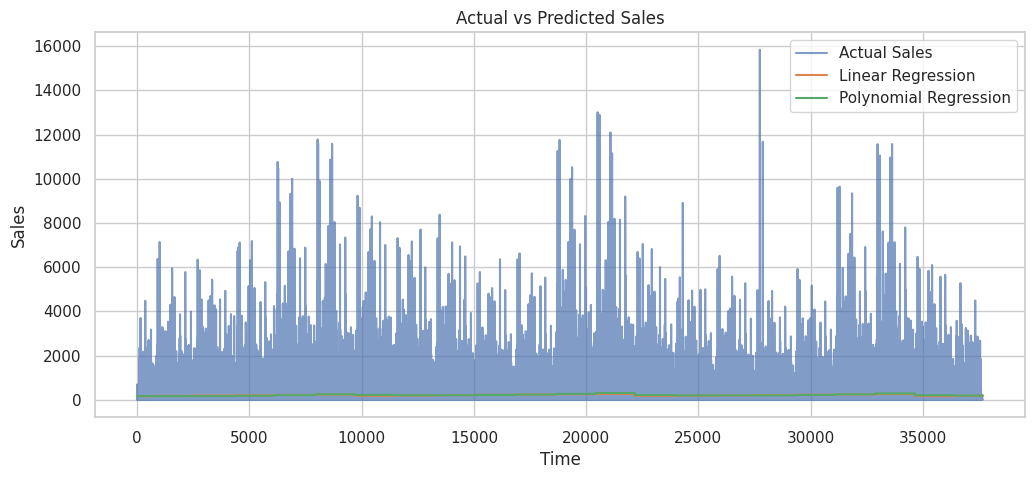

In [15]:
# @title Actual vs Predicted Visualization

plt.plot(y_test.values, label="Actual Sales", alpha=0.7)
plt.plot(y_pred_lr, label="Linear Regression")
plt.plot(y_pred_poly, label="Polynomial Regression")

plt.title("Actual vs Predicted Sales")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.legend()
plt.show()


### **Key Insights**
- Time-based feature engineering significantly improves regression performance.
- Polynomial regression captures non-linear trends and seasonality better than linear regression.
- Time-aware train-test splitting prevents data leakage.
- Regression models can be effectively adapted for time series forecasting.


### **Conclusion**
This project demonstrates how regression models can be extended to handle
time-series data by incorporating trend and seasonality features.
Polynomial regression outperformed baseline linear regression, making it
a stronger choice for sales forecasting tasks.
